- 利用合适的包对事务型数据进行数据理解（描述性分析等），完成数据的预处理（缺失值、重复值、某特定规则的值的处理），转换原始数据的形式以适用于关联规则分析，利用Apriori算法找出数据集的关联关系。

In [1]:
! pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.1 MB/s eta 0:00:0000:0100:010m


In [3]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [6]:
association_rules

<function mlxtend.frequent_patterns.association_rules.association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)>

In [4]:
df_Retails = pd.read_excel('./Online Retail.xlsx')
df_Retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df_Retails.shape

(541909, 8)

In [8]:
df_Retails.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df_Retails.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df_Retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df_Retails.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
df_Retails["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [13]:
df_Retails.duplicated(subset=["InvoiceNo"]).any()
df_Retails.shape

(541909, 8)

In [14]:
b = df_Retails[~df_Retails.duplicated()]
b.shape

(536641, 8)

In [15]:
df_Retails.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df_Retails.dropna(axis=0,
                  subset=['Description'],
                  inplace=True)
df_Retails.shape

(540455, 8)

In [17]:
df_Retails['Description'].isna().sum()

0

In [18]:
df_Retails['InvoiceNo'] = df_Retails['InvoiceNo'].astype(str)
df_Retails = df_Retails[~df_Retails['InvoiceNo'].str.contains('C')]
df_Retails.shape

(531167, 8)

In [19]:
df_Retails["Country"].value_counts()

Country
United Kingdom          486168
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [30]:
df_ShoppingCarts = (df_Retails[df_Retails['Country'] == 'Netherlands']
                    .groupby(['InvoiceNo', 'Description'])['Quantity']
                    .sum()
                    .unstack()
                    .fillna(0))
df_ShoppingCarts.head()

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_ShoppingCarts.reset_index().duplicated(subset=['InvoiceNo']).any()

False

In [32]:
def encode_units(x):
  if x <= 0:
    return 0
  elif x >= 1:
    return 1

df_ShoppingCarts_sets = df_ShoppingCarts.applymap(encode_units)
df_ShoppingCarts_sets

/var/folders/vq/zvftp9s17_99rtmwf15yvvsc0000gn/T/ipykernel_41334/4070804047.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ShoppingCarts_sets = df_ShoppingCarts.applymap(encode_units)


Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578143,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_Frequent_itemsets = apriori(df_ShoppingCarts_sets,
                               min_support=0.07,
                               use_colnames=True)
df_Frequent_itemsets

/Users/jiangcheng/miniconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.073684,(3 HOOK HANGER MAGIC GARDEN)
1,0.073684,(36 FOIL HEART CAKE CASES)
2,0.073684,(5 HOOK HANGER RED MAGIC TOADSTOOL)
3,0.105263,(72 SWEETHEART FAIRY CAKE CASES)
4,0.073684,(BREAD BIN DINER STYLE PINK)
...,...,...
426,0.073684,"(SPACEBOY BIRTHDAY CARD, SPACEBOY LUNCH BOX , ..."
427,0.073684,"(SPACEBOY LUNCH BOX , ROUND SNACK BOXES SET OF..."
428,0.073684,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ..."
429,0.073684,"(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B..."


In [34]:
df_Frequent_itemsets.shape

(431, 2)

In [35]:
df_AssociationRules = association_rules(df_Frequent_itemsets,
                                        metric="lift",
                                        min_threshold=1)
df_AssociationRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,0.070360,7.684211,0.830065
1,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.231579,0.105263,0.094737,0.409091,3.886364,0.070360,1.514170,0.966514
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(72 SWEETHEART FAIRY CAKE CASES),0.178947,0.105263,0.073684,0.411765,3.911765,0.054848,1.521053,0.906593
3,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.105263,0.178947,0.073684,0.700000,3.911765,0.054848,2.736842,0.831933
4,(ROUND SNACK BOXES SET OF4 WOODLAND ),(72 SWEETHEART FAIRY CAKE CASES),0.263158,0.105263,0.073684,0.280000,2.660000,0.045983,1.242690,0.846939
...,...,...,...,...,...,...,...,...,...,...
1833,(ROUND SNACK BOXES SET OF 4 FRUITS ),"(STRAWBERRY LUNCH BOX WITH CUTLERY, SPACEBOY L...",0.178947,0.084211,0.073684,0.411765,4.889706,0.058615,1.556842,0.968864
1834,(SPACEBOY LUNCH BOX ),"(ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...",0.294737,0.073684,0.073684,0.250000,3.392857,0.051967,1.235088,1.000000
1835,(DOLLY GIRL LUNCH BOX),"(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ...",0.231579,0.073684,0.073684,0.318182,4.318182,0.056620,1.358596,1.000000
1836,(STRAWBERRY LUNCH BOX WITH CUTLERY),"(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ...",0.147368,0.105263,0.073684,0.500000,4.750000,0.058172,1.789474,0.925926


In [43]:
df_A = df_AssociationRules[(df_AssociationRules['lift'] >= 2) &
                           (df_AssociationRules['confidence'] >= 0.8)]
df_A

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,0.070360,7.684211,0.830065
7,(72 SWEETHEART FAIRY CAKE CASES),(SPACEBOY LUNCH BOX ),0.105263,0.294737,0.094737,0.900000,3.053571,0.063712,7.052632,0.751634
11,(CARD BIRTHDAY COWBOY),(SPACEBOY BIRTHDAY CARD),0.094737,0.178947,0.084211,0.888889,4.967320,0.067258,7.389474,0.882267
13,(CARD BIRTHDAY COWBOY),(SPACEBOY LUNCH BOX ),0.094737,0.294737,0.084211,0.888889,3.015873,0.056288,6.347368,0.738372
44,(CHILDREN'S APRON DOLLY GIRL ),(DOLLY GIRL LUNCH BOX),0.084211,0.231579,0.073684,0.875000,3.778409,0.054183,6.147368,0.802956
...,...,...,...,...,...,...,...,...,...,...
1816,"(ROUND SNACK BOXES SET OF 4 FRUITS , STRAWBERR...","(SPACEBOY LUNCH BOX , ROUND SNACK BOXES SET OF...",0.073684,0.189474,0.073684,1.000000,5.277778,0.059723,inf,0.875000
1818,"(ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...","(SPACEBOY LUNCH BOX , DOLLY GIRL LUNCH BOX)",0.084211,0.221053,0.073684,0.875000,3.958333,0.055069,6.231579,0.816092
1821,"(STRAWBERRY LUNCH BOX WITH CUTLERY, SPACEBOY L...","(ROUND SNACK BOXES SET OF 4 FRUITS , DOLLY GIR...",0.084211,0.115789,0.073684,0.875000,7.556818,0.063934,7.073684,0.947455
1822,"(STRAWBERRY LUNCH BOX WITH CUTLERY, ROUND SNAC...","(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ...",0.084211,0.126316,0.073684,0.875000,6.927083,0.063047,6.989474,0.934319


In [37]:
df_A.shape

(516, 10)

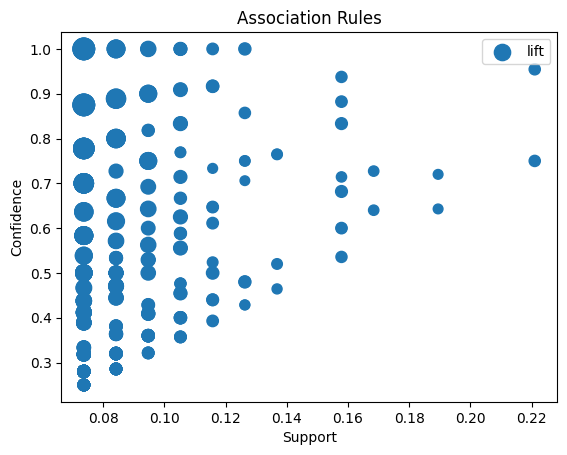

In [41]:
from matplotlib import pyplot as plt

plt.scatter(
  x = df_AssociationRules['support'],
  y = df_AssociationRules['confidence'],
  s = df_AssociationRules['lift'] * 20,
)

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.legend(["lift"])
plt.show()

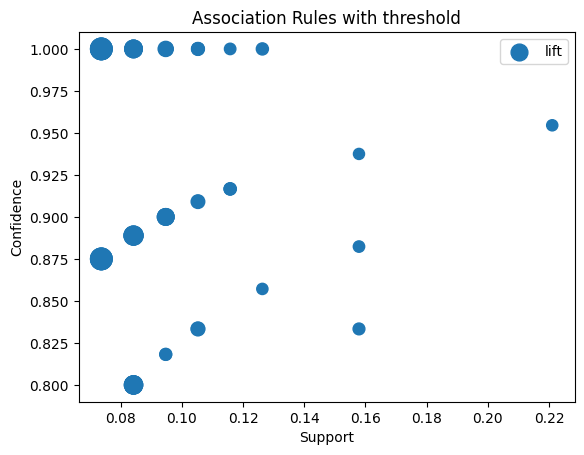

In [42]:
from matplotlib import pyplot as plt

plt.scatter(
  # x = df_AssociationRules['support'],
  # y = df_AssociationRules['confidence'],
  # s = df_AssociationRules['lift'] * 20,
  x = df_A['support'],
  y = df_A['confidence'],
  s = df_A['lift'] * 20,
)

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules with threshold')
plt.legend(["lift"])
plt.show()